## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.DataFrame(pd.merge(mouse_metadata,study_results, on = "Mouse ID"))

# Display the data table for preview
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_data["Mouse ID"].value_counts()

g989    13
k483    10
c758    10
g791    10
j989    10
        ..
x336     1
v199     1
l872     1
n482     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_data = total_data.groupby("Mouse ID")
mouse_data_dup = pd.DataFrame(mouse_data["Timepoint"].value_counts())
mouse_data_dup.loc[mouse_data_dup["Timepoint"] > 1]




Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
total_data.loc[total_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = total_data.drop(index = (total_data.loc[total_data["Mouse ID"]=="g989"].index))


    

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()

g791    10
o331    10
c758    10
j119    10
y793    10
        ..
x336     1
v199     1
l872     1
n482     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor = clean_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = pd.DataFrame(tumor["Tumor Volume (mm3)"].mean())
tumor_median = pd.DataFrame(tumor["Tumor Volume (mm3)"].median())
tumor_variance = pd.DataFrame(tumor["Tumor Volume (mm3)"].var())
tumor_std = pd.DataFrame(tumor["Tumor Volume (mm3)"].std())
tumor_sem = pd.DataFrame(tumor["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe.
tumor_mean.rename(columns = {"Tumor Volume (mm3)": "Mean"}, inplace = True)
tumor_mean["Median"] = tumor_median["Tumor Volume (mm3)"]
tumor_mean["Variance"] = tumor_variance["Tumor Volume (mm3)"]
tumor_mean["Standard Deviation"] = tumor_std["Tumor Volume (mm3)"]
tumor_mean["SEM"] = tumor_sem["Tumor Volume (mm3)"]

tumor_mean
                                                              


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_data

drug_data = pd.DataFrame(clean_data.groupby("Drug Regimen")["Timepoint"].count())
regimen = drug_data.index
measurements = drug_data["Timepoint"]

<BarContainer object of 10 artists>

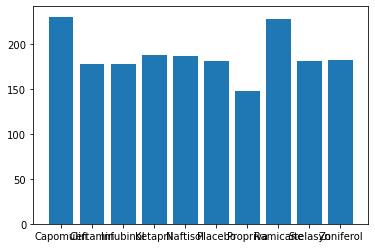

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen,measurements)

<AxesSubplot:ylabel='Sex'>

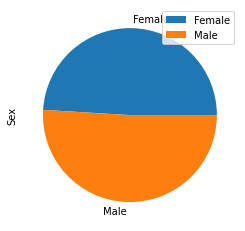

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_data = pd.DataFrame(clean_data.groupby("Sex")["Sex"].count())
sex_data.plot.pie(y = "Sex")

([<matplotlib.patches.Wedge at 0x1aca9d58400>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

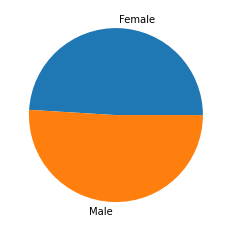

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_data.index
count = sex_data["Sex"]

plt.pie(count,labels = sex)


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

best_drugs = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")|
                            (clean_data["Drug Regimen"] == "Ramicane")|
                            (clean_data["Drug Regimen"] == "Infubinol")|
                            (clean_data["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse

max_mouse = pd.DataFrame(best_drugs.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max())
max_mouse.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_finaldata = pd.merge(max_mouse,clean_data,on=["Mouse ID","Drug Regimen","Timepoint"])
tumor_finaldata = tumor_finaldata[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)"]]

tumor_finaldata

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [185]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_finaldata["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


# Determine outliers using upper and lower bounds
lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)



#tumor_finaldata.loc[(tumor_finaldata["Tumor Volume (mm3)"] > upperbound)|
                   #(tumor_finaldata["Tumor Volume (mm3)"] < lowerbound)]



array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

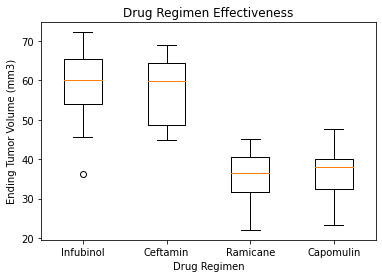

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = tumor_finaldata["Drug Regimen"].unique()

infubinol = []
ceftamin = []
ramicane = []
capomulin = []

for i in tumor_finaldata.index:
    if tumor_finaldata["Drug Regimen"][i] == treatments[0]:
        infubinol.append(tumor_finaldata["Tumor Volume (mm3)"][i])
    elif tumor_finaldata["Drug Regimen"][i] == treatments[1]:
        ceftamin.append(tumor_finaldata["Tumor Volume (mm3)"][i])
    elif tumor_finaldata["Drug Regimen"][i] == treatments[2]:
        ramicane.append(tumor_finaldata["Tumor Volume (mm3)"][i])
    elif tumor_finaldata["Drug Regimen"][i] == treatments[3]:
        capomulin.append(tumor_finaldata["Tumor Volume (mm3)"][i])
        
fig1, ax1 = plt.subplots()
ax1.boxplot([infubinol,ceftamin,ramicane,capomulin])
ax1.set_title('Drug Regimen Effectiveness')
ax1.set_ylabel('Ending Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
plt.xticks([1,2,3,4],["Infubinol","Ceftamin","Ramicane","Capomulin"])
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Progression')

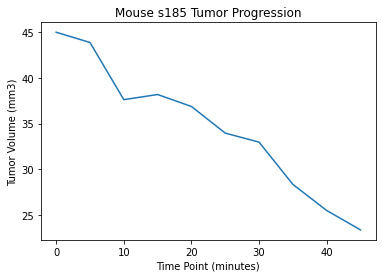

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_data =  clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
cap_data

capmouse_data = cap_data.loc[cap_data["Mouse ID"]=="s185"]
mousetumor_vol = capmouse_data["Tumor Volume (mm3)"]
mousetimepoint = capmouse_data["Timepoint"]

plt.plot(mousetimepoint,mousetumor_vol)
plt.xlabel("Time Point (minutes)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 Tumor Progression")

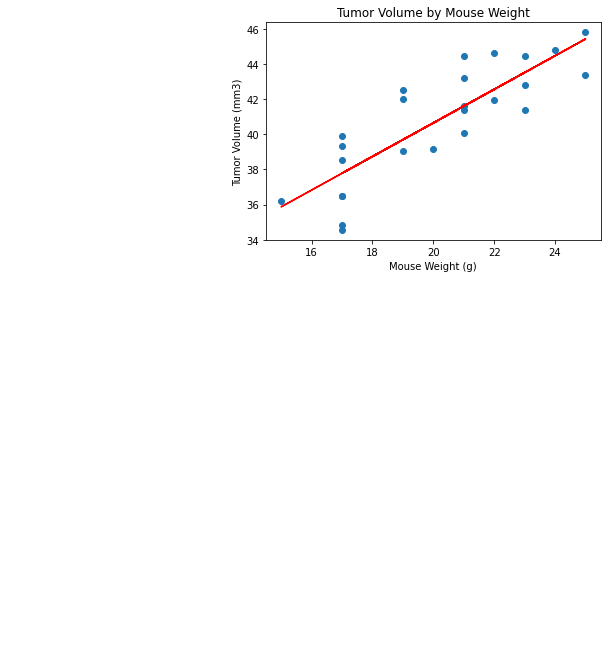

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorbyweight = pd.DataFrame(cap_data.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean())
tumorbyweight = tumorbyweight.reset_index()

mouseweight = tumorbyweight["Weight (g)"]
mousetumor = tumorbyweight["Tumor Volume (mm3)"]

plt.scatter(mouseweight,mousetumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume by Mouse Weight")

# Calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouseweight, mousetumor)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(mouseweight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.show()

## Correlation and Regression